In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [21]:
os.chdir('/Users/USER/proyectos/titanic/')
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Percentaje of NA

In [22]:
df.isna().sum(axis = 0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Variable cleaning

Eliminating Cabin because many NAs and it is not useful

In [23]:
df = df.drop(['Cabin'], axis = 1)

Delete all records that have a null Age

In [24]:
df = df[df.Age.notna()]

In [25]:
df.isna().sum(axis = 0)/ len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002801
dtype: float64

## Defining discrete and continuous vectors

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
vars_disc = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

We differentiate between categorical and ordinal discrete variables

In [28]:
for i in vars_disc:
    print(df[i].value_counts())

0    424
1    290
Name: Survived, dtype: int64
3    355
1    186
2    173
Name: Pclass, dtype: int64
male      453
female    261
Name: Sex, dtype: int64
0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64
0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    554
C    130
Q     28
Name: Embarked, dtype: int64


In [29]:
for i in vars_cat:
    categorias = df[i].value_counts().index #names
    print(categorias)
    
    for k in categorias:
        name = 'is-'+str(i)+'-'+str(k)
        print(name)
        df[name] = np.where(df[i] == k, 1,0)
    
    df = df.drop([i], axis = 1)

Int64Index([3, 1, 2], dtype='int64')
is-Pclass-3
is-Pclass-1
is-Pclass-2
Index(['male', 'female'], dtype='object')
is-Sex-male
is-Sex-female
Index(['S', 'C', 'Q'], dtype='object')
is-Embarked-S
is-Embarked-C
is-Embarked-Q


## We look for the outliers

If it exceeds the lower or upper limit by 1.5 times the interquartile range, they are changed by the model mean. By TLC

In [ ]:
vars_num = ['Fare', 'Age']
for i in vars_num:
    var_stats = df[i].describe()
    Q1 = var_stats['25%']
    Q3 = var_stats['75%']
    RI = Q3 - Q1
    lim_inf = Q1 - 1.5*RI
    lim_sup = Q3 + 1.5*RI
    
    df[i] = df[i].apply(lambda x: np.mean(df[i]) if (x > lim_sup or x < lim_inf) else x)
    
#Remove if it's null,  
    if df[i].isnull().values.any() == True:
        df[i] = df[i].dropna()

## Enrichment, we create a new variable that is the union of Sibsp and Parch

In [32]:
df['family_size'] = df['SibSp'] + df['Parch']

## We create a heatmap to search for multicollinearity

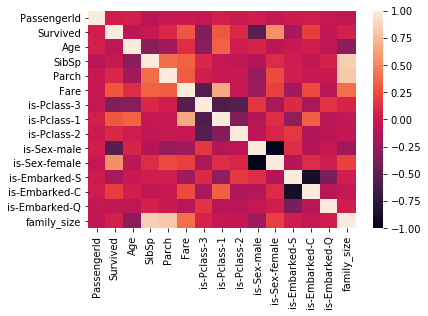

In [33]:
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)